# Results and visualizations
This notebook contains a set of visualizations and graphs based on the different hypotheses and conducted experiments against them. The format is as follows:
- Import of required packages and initialization of parameters that are used throughout the notebook
- A section is dedicated for each of the hypotheses of the thesis that contains more information about the hypothesis, the experiments and the respective results, along with visualizations and graphs.

In [1]:
# Imports
import os
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
from datetime import timedelta as td

## PART 1 - Hypothesis 1: Guided vs. unguided search

**Statement**: *Guided search algorithms (SMAC) shall have better performance than unguided search (random search, equally distributed budget search).*

**Comments**:
- The comparison should be done per dataset.
- The comparison should be done for a specified validation strategy (e.g. stratified) and size (e.g. a percentage 30% of the original training set).

In [2]:
# H1 parameters
#
# Datasets
h1_datasets = [
    'ALOI',
    'Annthyroid',
    'Cardiotocography',
    'PageBlocks',
    'SpamBase',
    'Waveform'
]
# Total budget allocated
h1_total_budget = 300
# Validation strategy and size
h1_validation_strategy = 'stratified'
h1_validation_size = '400'
# Results path (based on current directory)
h1_output_dir = 'milestone1' # directory of search output
h1_output_path = os.path.join(Path.cwd().parent, 'output', h1_output_dir, 'performance')
# Colors for plotting consistently
h1_colors = {
    'edb': 'orange',
    'random': 'green',
    'smac': 'royalblue',
}

# Plotting function for H1
def plot_h1_results(type):
    for i, dataset in enumerate((h1_datasets)):
        for file in os.listdir(h1_output_path):
            if dataset in file and h1_validation_strategy in file and h1_validation_size in file:
                #print(file)
                # import performance data as DataFrame
                perf_df = pd.read_csv(os.path.join(h1_output_path, file), parse_dates=['Timestamp'])
                # x-axis (time)
                x = (perf_df.Timestamp-perf_df.Timestamp[0]).apply(td.total_seconds)
                x.at[x.shape[0]] = h1_total_budget
                # score based on type
                if type == 'optimization':
                    y = perf_df.single_best_optimization_score
                    y.at[y.shape[0]] = y.at[y.shape[0]-1]
                elif type == 'test':
                    y = perf_df.single_best_test_score
                    y.at[y.shape[0]] = y.at[y.shape[0]-1]  
                # plot
                label = file.split('_')[1]
                ax = plt.subplot(3, 3, i + 1)
                ax.set_ylim([0.5, 1.])
                ax.set_xlabel('seconds')
                ax.set_ylabel('score')
                ax.plot(x, y, label=label, color=h1_colors[label])
                ax.grid()
                handles, labels = ax.get_legend_handles_labels()
                labels, handles = zip(
                    *sorted(zip(labels, handles), key=lambda t: t[0]))
                ax.legend(handles, labels, loc='lower right')
                plt.title(dataset)

### PART 1.A - Optimization performance
The below graphs display the optimization performance, i.e. the performance on the validation set used in Bayesian Optimization, per dataset

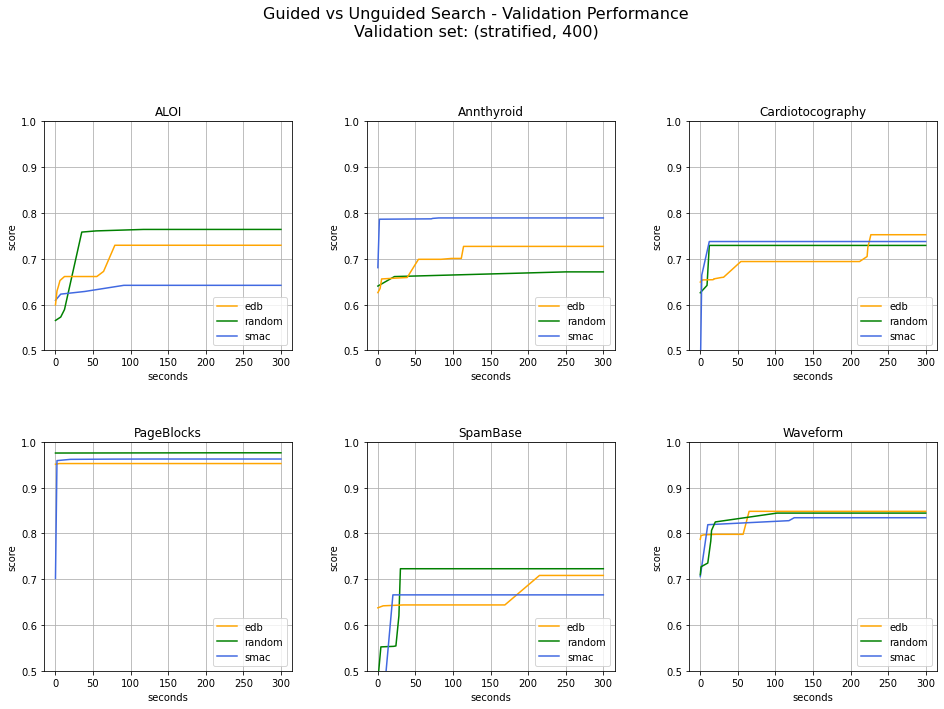

In [3]:
# Plots of performance on validation set
fig = plt.figure(figsize=(16, 16))
fig.suptitle('Guided vs Unguided Search - Validation Performance\nValidation set: ({}, {})'.format(h1_validation_strategy, h1_validation_size), fontsize=16)
fig.subplots_adjust(wspace=0.3, hspace=0.4) # space between plots
plot_h1_results('optimization')

### Part 1.B - Test set performance
The below graphs display the test set performance per dataset

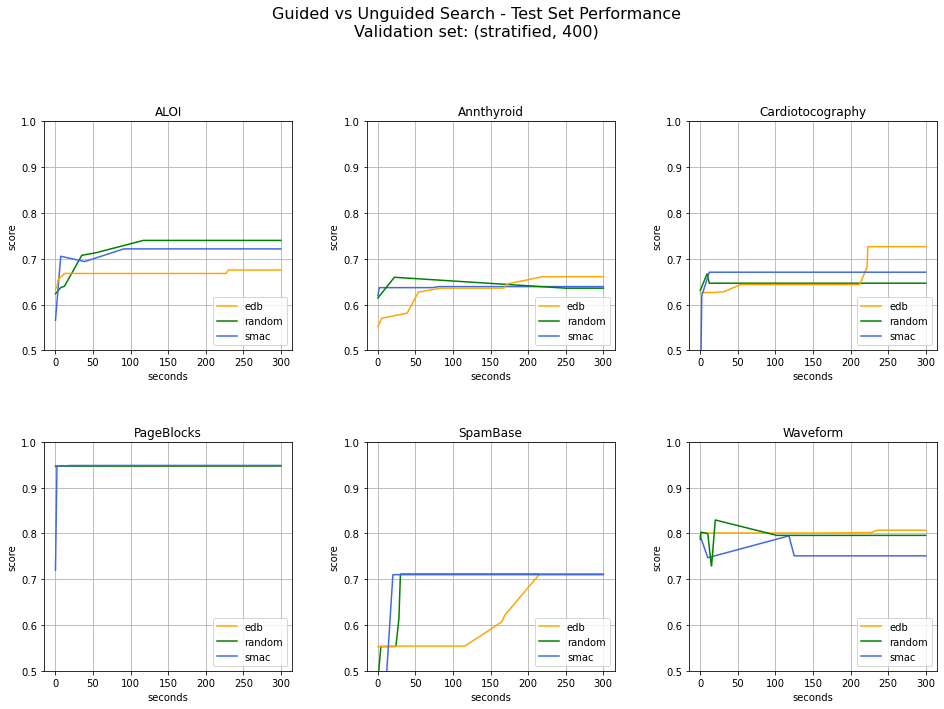

In [4]:
# Plots of performance on test set
fig = plt.figure(figsize=(16, 16))
fig.suptitle('Guided vs Unguided Search - Test Set Performance\nValidation set: ({}, {})'.format(h1_validation_strategy, h1_validation_size), fontsize=16)
fig.subplots_adjust(wspace=0.3, hspace=0.4) # space between plots
plot_h1_results('test')

## PART 2 - Hypothesis 2: Stratified vs. balanced validation sets

**Statement**: *Stratified validation sets shall result in better performance compared to biased (balanced) validation sets.*

**Comments**:
- The expectation of better performance when using stratified validation sets stems from the fact that stratified-sampled validation sets better represent the actual data distribution.
- The comparison should be done per dataset.
- The comparison should be done per search algorithm (equally distributed budget, random, smac)
- The comparison should be done for a specified validation set size (e.g. 30% of the original training set).

In [5]:
# H2 parameters
#
# Datasets
h2_datasets = [
    'ALOI',
    'Annthyroid',
    'Cardiotocography',
    'PageBlocks',
    'SpamBase',
    'Waveform'
]
# Total budget allocated
h2_total_budget = 300
# Validation strategy and size
h2_validation_size = '100'
# Results path (based on current directory)
h2_output_dir = 'milestone1' # directory of search output
h2_output_path = os.path.join(Path.cwd().parent, 'output', h2_output_dir, 'performance')
# Colors for plotting consistently
h2_colors = {
    'stratified': 'orange',
    'balanced': 'green',
}

# Plotting function for H2
def plot_h2_results(h2_search_algorithm):
    for i, dataset in enumerate((h2_datasets)):
        for file in os.listdir(h2_output_path):
            if dataset in file and h2_search_algorithm in file and h2_validation_size in file:
                #print(file)
                # import performance data as DataFrame
                perf_df = pd.read_csv(os.path.join(h2_output_path, file), parse_dates=['Timestamp'])
                # x-axis (time)
                x = (perf_df.Timestamp-perf_df.Timestamp[0]).apply(td.total_seconds)
                x.at[x.shape[0]] = h2_total_budget
                # test score
                y_test = perf_df.single_best_test_score
                y_test.at[y_test.shape[0]] = y_test.at[y_test.shape[0]-1]
                # plot
                label = file.split('_')[2]
                ax = plt.subplot(3, 3, i + 1)
                ax.set_ylim([0.5, 1.])
                ax.set_xlabel('seconds')
                ax.set_ylabel('score')
                ax.plot(x, y_test, label=label, color=h2_colors[label])
                ax.grid()
                handles, labels = ax.get_legend_handles_labels()
                labels, handles = zip(
                    *sorted(zip(labels, handles), key=lambda t: t[0]))
                ax.legend(handles, labels, loc='lower right')
                plt.title(dataset)

### Part 2.A - SMAC Search
The below graphs display the test set performance per dataset for the SMAC search

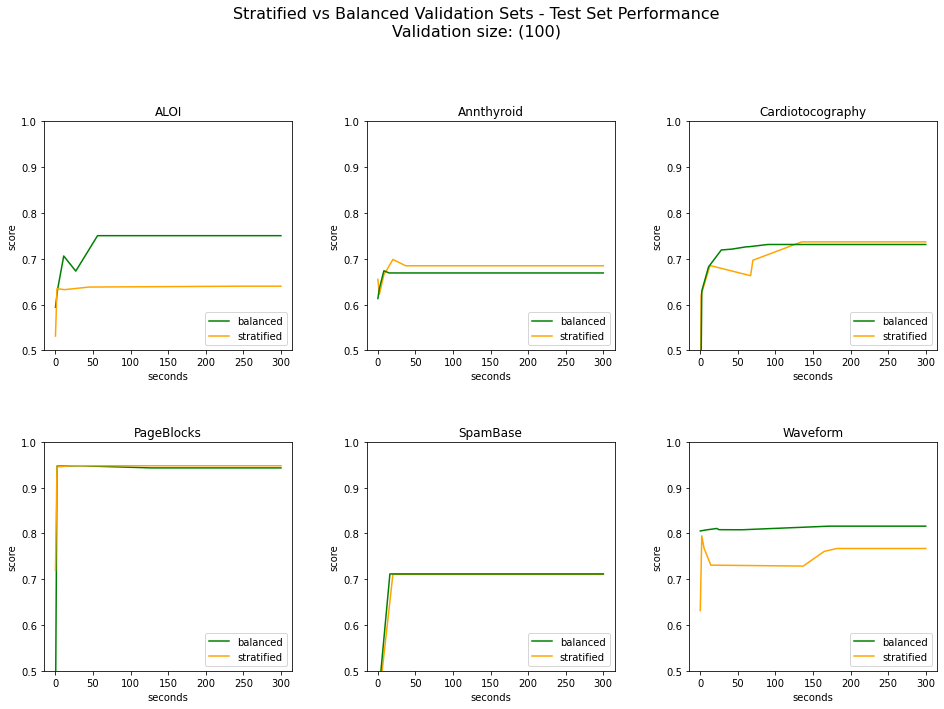

In [6]:
# Plot results for SMAC search
fig = plt.figure(figsize=(16, 16))
fig.suptitle('Stratified vs Balanced Validation Sets - Test Set Performance\nValidation size: ({})'.format(h2_validation_size), fontsize=16)
fig.subplots_adjust(wspace=0.3, hspace=0.4) # space between plots
plot_h2_results('smac')

### Part 2.B - Random Search
The below graphs display the test set performance per dataset for *Random Search*

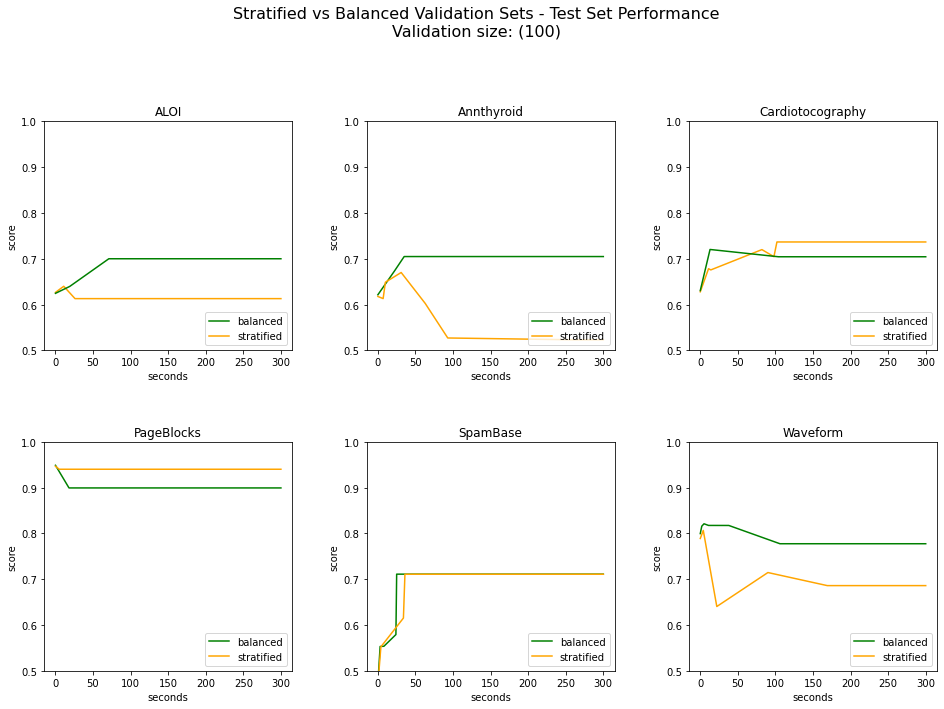

In [7]:
# Plot results for Random Search
fig = plt.figure(figsize=(16, 16))
fig.suptitle('Stratified vs Balanced Validation Sets - Test Set Performance\nValidation size: ({})'.format(h2_validation_size), fontsize=16)
fig.subplots_adjust(wspace=0.3, hspace=0.4) # space between plots
plot_h2_results('random')

### Part 2.C - Equally Distributed Budget Search
The below graphs display the test set performance per dataset for the *Equally Distributed Budget Search*

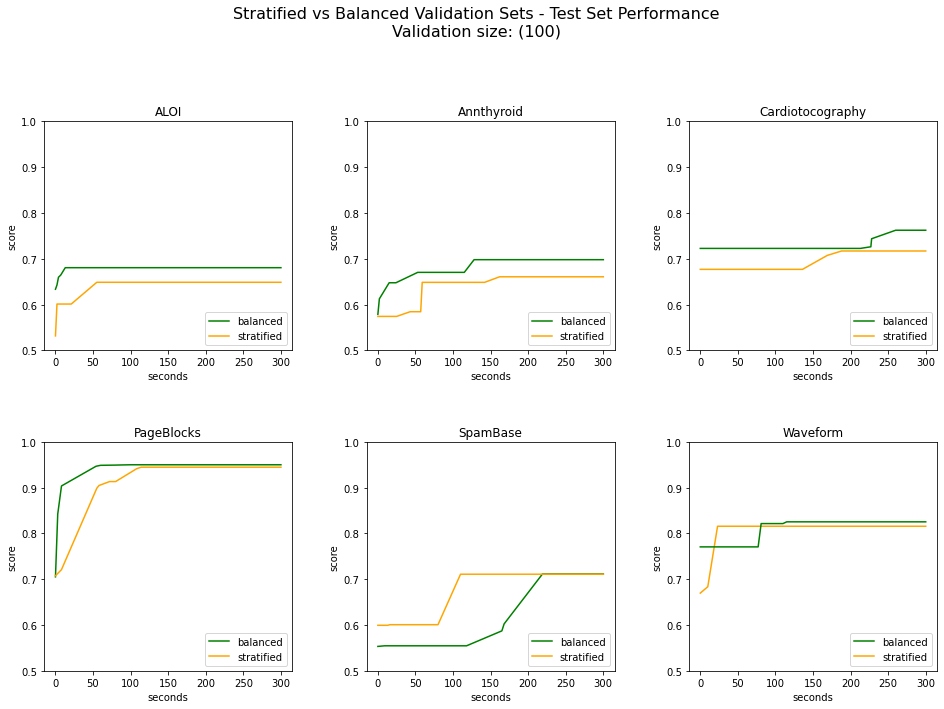

In [8]:
# Plot results for Equally Distributed Budget search
fig = plt.figure(figsize=(16, 16))
fig.suptitle('Stratified vs Balanced Validation Sets - Test Set Performance\nValidation size: ({})'.format(h2_validation_size), fontsize=16)
fig.subplots_adjust(wspace=0.3, hspace=0.4) # space between plots
plot_h2_results('edb')

## Hypothesis 3 - Larger vs. smaller validation sets

**Statement**: *Larger validation sets shall result in better performance compared to smaller validation sets.*

**Comments**:
- Validation set sizes to compare: 20, 50, 100, 200, 400
- Comparison should be done per dataset
- Comparison should be done per search algorithm

In [9]:
import operator
# H3 parameters
#
# Datasets
h3_datasets = [
    'ALOI',
    'Annthyroid',
    'Cardiotocography',
    'PageBlocks',
    'SpamBase',
    'Waveform'
]
# Total budget allocated
h3_total_budget = 300
# Validation strategy and size
h3_validation_strategy = 'stratified'
h3_validation_size = [50, 100, 200]
# Results path (based on current directory)
h3_output_dir = 'milestone1' # directory of search output
h3_output_path = os.path.join(Path.cwd().parent, 'output', h3_output_dir, 'performance')
# Colors for plotting consistently
h3_colors = {
    #20: 'yellow',
    50: 'orange',
    100: 'green',
    200: 'royalblue',
    #400: 'gray',
}

# Plotting function for H3
def plot_h3_results(h3_search_algorithm):
    for i, dataset in enumerate((h3_datasets)):
        for file in os.listdir(h3_output_path):
            if (dataset in file and h3_search_algorithm in file and h3_validation_strategy in file 
                and any(str(size) in file for size in h3_validation_size)):
                #print(file)
                # import performance data as DataFrame
                perf_df = pd.read_csv(os.path.join(h2_output_path, file), parse_dates=['Timestamp'])
                # x-axis (time)
                x = (perf_df.Timestamp-perf_df.Timestamp[0]).apply(td.total_seconds)
                x.at[x.shape[0]] = h3_total_budget
                # test score
                y_test = perf_df.single_best_test_score
                y_test.at[y_test.shape[0]] = y_test.at[y_test.shape[0]-1]
                # plot
                label = int(file.split('_')[3].split('.')[0])
                ax = plt.subplot(3, 3, i + 1)
                ax.set_ylim([0.2, 1.])
                ax.set_xlabel('seconds')
                ax.set_ylabel('score')
                ax.plot(x, y_test, label=label, color=h3_colors[label])
                ax.grid()
                handles, labels = ax.get_legend_handles_labels()
                labels = [int(l) for l in labels] # convert to integer for sorting
                labels, handles = zip(
                *sorted(zip(labels, handles), key=lambda t: t[0]))
                ax.legend(handles, labels, loc='lower right')
                plt.title(dataset)

### Part 3.A - SMAC Search
The below graphs display the test set performance per dataset for the **SMAC Search**

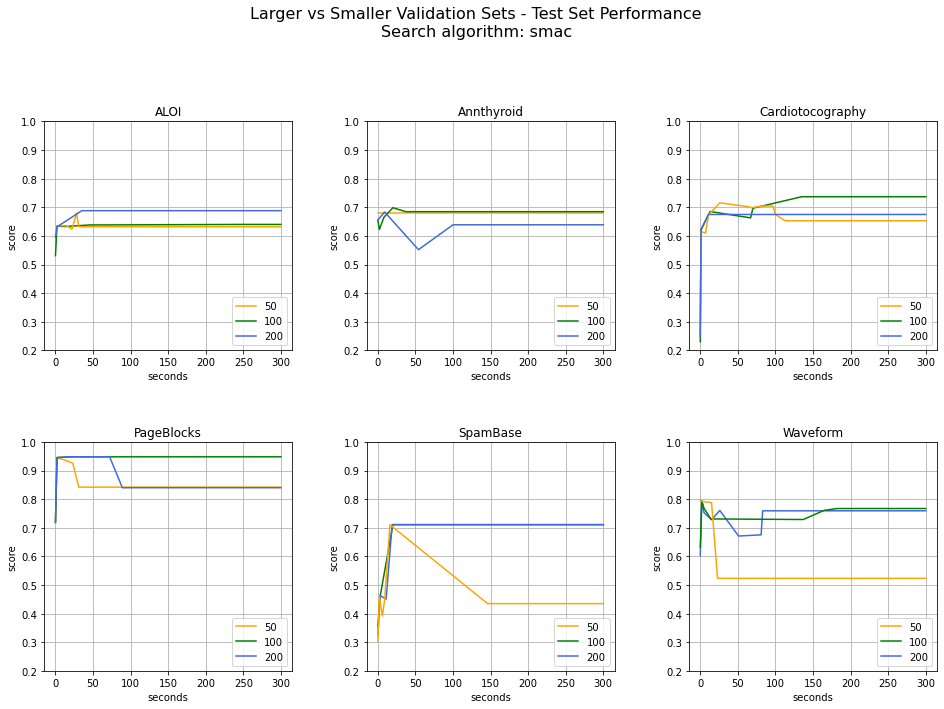

In [10]:
# Plots of performance on test set
fig = plt.figure(figsize=(16, 16))
fig.suptitle('Larger vs Smaller Validation Sets - Test Set Performance\nSearch algorithm: smac', fontsize=16)
fig.subplots_adjust(wspace=0.3, hspace=0.4) # space between plots
plot_h3_results('smac')

### Part 3.B - Random Search
The below graphs display the test set performance per dataset for **Random Search**

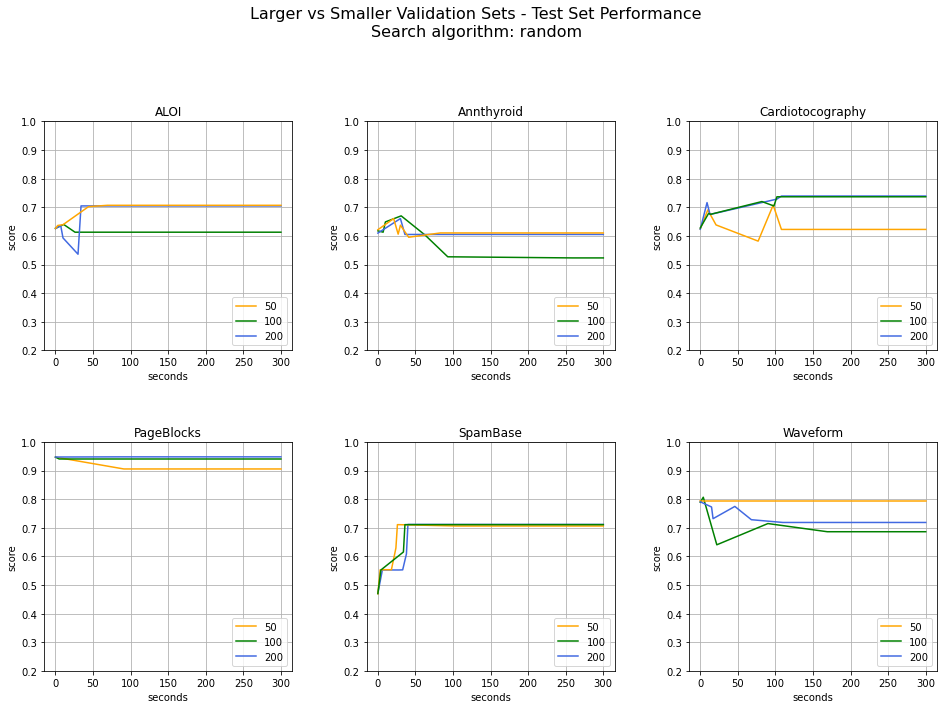

In [11]:
# Plots of performance on test set
fig = plt.figure(figsize=(16, 16))
fig.suptitle('Larger vs Smaller Validation Sets - Test Set Performance\nSearch algorithm: random', fontsize=16)
fig.subplots_adjust(wspace=0.3, hspace=0.4) # space between plots
plot_h3_results('random')

### Part 3.C - Equally Distributed Budget Search
The below graphs display the test set performance per dataset for the **Equally Distributed Budget Search**

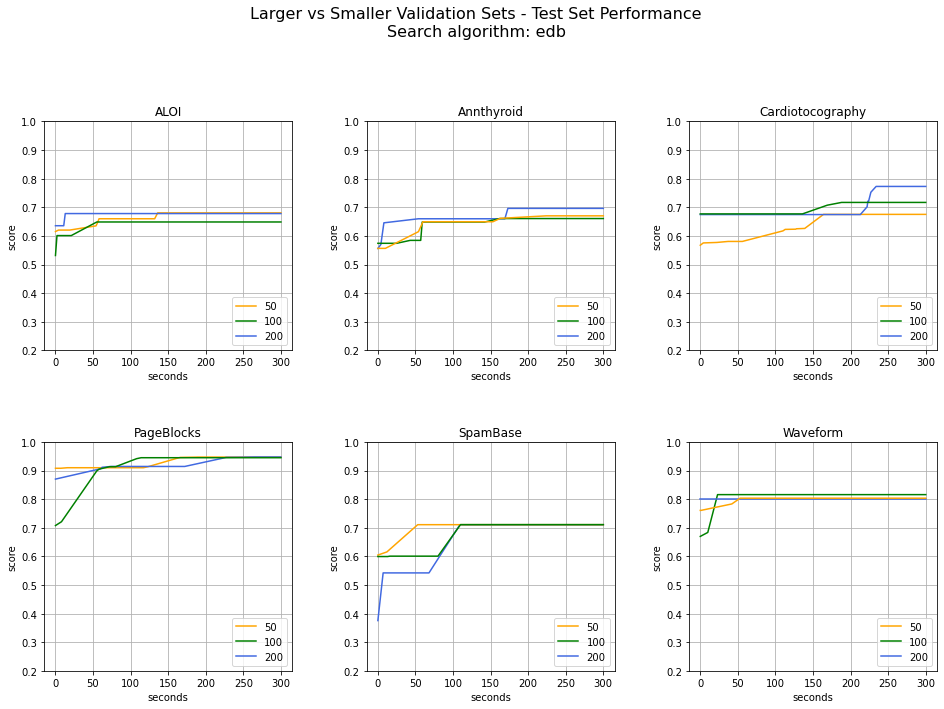

In [12]:
# Plots of performance on test set
fig = plt.figure(figsize=(16, 16))
fig.suptitle('Larger vs Smaller Validation Sets - Test Set Performance\nSearch algorithm: edb', fontsize=16)
fig.subplots_adjust(wspace=0.3, hspace=0.4) # space between plots
plot_h3_results('edb')